In [ ]:
pip install meteostat

In [85]:
import requests

def get_nearest_station(lat, lon):
    url = 'https://meteostat.p.rapidapi.com/stations/nearby'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace with your actual API key
    }
    params = {
        'lat': lat,
        'lon': lon
    }
    try:
        response = requests.get(url, headers=headers, params=params)
        response.raise_for_status()  # Raise an exception for HTTP errors
        data = response.json()
        return data['data'][0]['id'] if data['data'] else None
    except requests.RequestException as e:
        print("Error fetching data:", e)
        return None

# Example usage
latitude = 38.9445
longitude = -77.4558
station_code = get_nearest_station(latitude, longitude)
print(station_code)  # This will print the nearest weather station code or None if an error occurs

Error fetching data: 400 Client Error: Bad Request for url: https://meteostat.p.rapidapi.com/stations/nearby?lat=38.9445&lon=-77.4558
None


IAD = Point(38.9445, -77.4558, 95) station ID is = 72403;


BWI = Point(39.1774, -76.6684, 146) #station ID is = 72406;


PHL = Point(39.8721, -75.2431, 36) #station ID is = 72408;


EWR = Point(40.6895, -74.1745, 18) #station ID is = 72502;


JFK = Point(40.6413, -73.7781, 13) #station ID is =74486;


LGA = Point(40.7769, -73.874, 21) #station ID is =72503;


BOS = Point(42.3656, 71.0096) #station ID is =72509;


ATL = Point (33.6407, 84.4277) #station ID is =72219.

### IAD Washing Dulles International Airport, Washington DC

In [57]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE IAD 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_iad_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_iad_2010_df
#Washing Dulles International Airport, Washington DC.

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-4.5,-14.4,3.3,0.0,51.0,NaN,6.1,None,1026.4,None,72403
1,2010-02-02,-1.6,-9.4,4.4,7.1,25.0,NaN,3.2,None,NaN,None,72403
2,2010-02-03,1.2,-2.8,4.4,0.5,102.0,NaN,8.3,None,1020.2,None,72403
3,2010-02-04,1.3,-2.8,4.4,0.0,51.0,NaN,7.6,None,1028.7,None,72403
4,2010-02-05,0.1,-1.1,1.7,37.3,25.0,NaN,9.7,None,NaN,None,72403
5,2010-02-06,-2.9,-12.2,0.0,50.3,457.0,NaN,16.9,None,NaN,None,72403
6,2010-02-07,-6.1,-13.9,-0.6,0.0,533.0,NaN,12.6,None,1016.5,None,72403
7,2010-02-08,-5.0,-10.6,0.0,0.0,508.0,NaN,11.9,None,1021.0,None,72403
8,2010-02-09,-4.6,-12.2,1.7,7.6,483.0,NaN,3.2,None,NaN,None,72403
9,2010-02-10,-3.6,-6.7,-1.1,10.7,660.0,321.0,31.0,None,NaN,None,72403


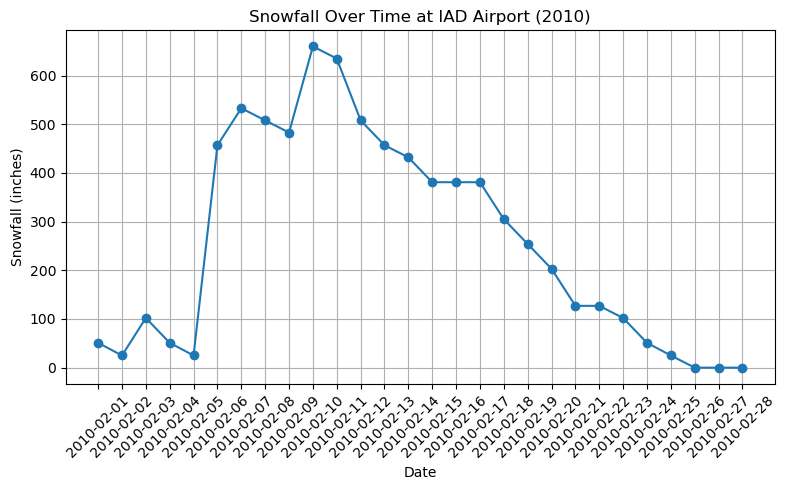

In [64]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(weather_iad_2010_df['date'], weather_iad_2010_df['snow'], marker='o', linestyle='-')
plt.title('Snowfall Over Time at IAD Airport (2010)')
plt.xlabel('Date')
plt.ylabel('Snowfall (inches)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

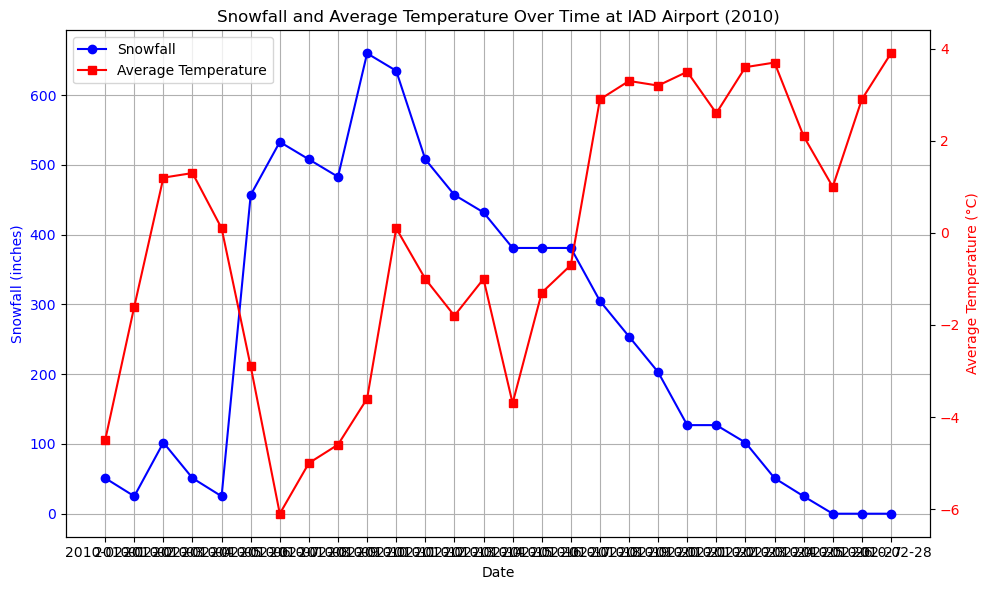

In [65]:
import matplotlib.pyplot as plt

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_iad_2010_df['date'], weather_iad_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Date')
ax1.set_ylabel('Snowfall (inches)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_iad_2010_df['date'], weather_iad_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Title
plt.title('Snowfall and Average Temperature Over Time at IAD Airport (2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


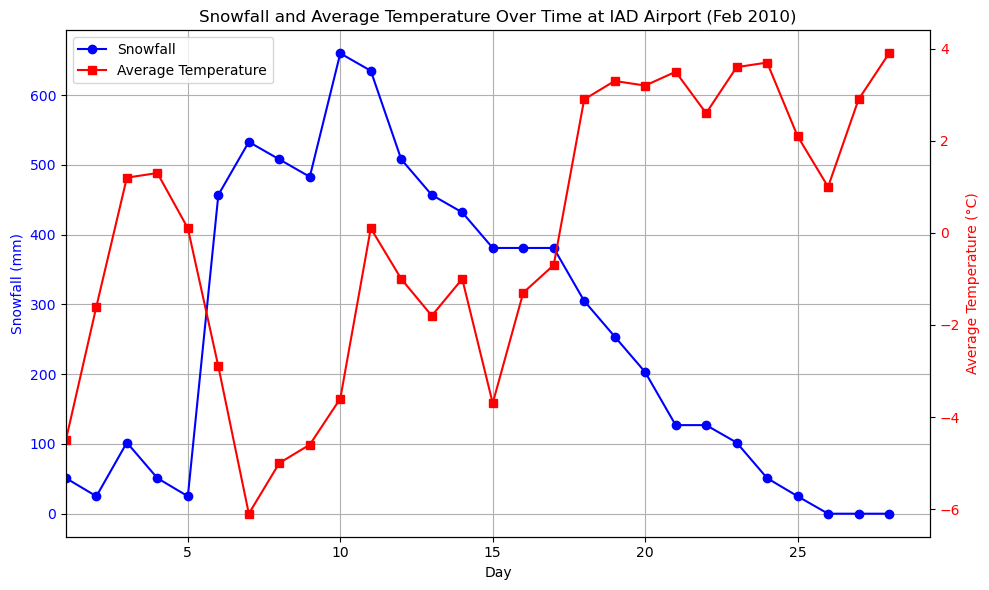

In [97]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_iad_2010_df['date'] = pd.to_datetime(weather_iad_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_iad_2010_df['date'].dt.day, weather_iad_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_iad_2010_df['date'].dt.day, weather_iad_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at IAD Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### BWI Baltimore/Washington International Thurgood Marshall Airport in Maryland

In [58]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE BWI 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_bwi_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_bwi_2010_df
#Baltimore/Washington International Thurgood Marshall Airport in Maryland

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-4.5,-14.4,3.3,0.0,51.0,NaN,6.1,None,1026.4,None,72403
1,2010-02-02,-1.6,-9.4,4.4,7.1,25.0,NaN,3.2,None,NaN,None,72403
2,2010-02-03,1.2,-2.8,4.4,0.5,102.0,NaN,8.3,None,1020.2,None,72403
3,2010-02-04,1.3,-2.8,4.4,0.0,51.0,NaN,7.6,None,1028.7,None,72403
4,2010-02-05,0.1,-1.1,1.7,37.3,25.0,NaN,9.7,None,NaN,None,72403
5,2010-02-06,-2.9,-12.2,0.0,50.3,457.0,NaN,16.9,None,NaN,None,72403
6,2010-02-07,-6.1,-13.9,-0.6,0.0,533.0,NaN,12.6,None,1016.5,None,72403
7,2010-02-08,-5.0,-10.6,0.0,0.0,508.0,NaN,11.9,None,1021.0,None,72403
8,2010-02-09,-4.6,-12.2,1.7,7.6,483.0,NaN,3.2,None,NaN,None,72403
9,2010-02-10,-3.6,-6.7,-1.1,10.7,660.0,321.0,31.0,None,NaN,None,72403


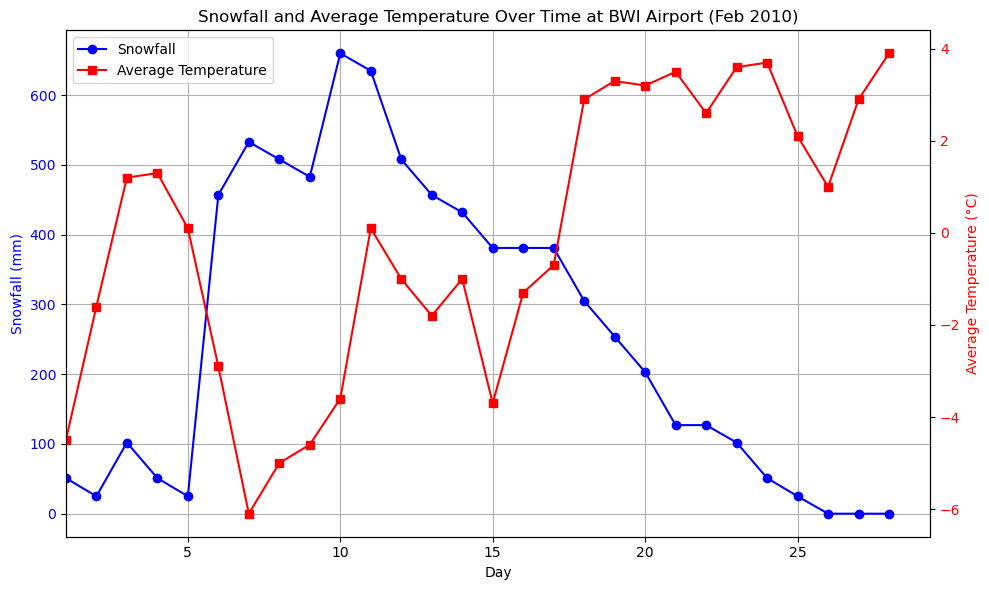

In [98]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_bwi_2010_df['date'] = pd.to_datetime(weather_bwi_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_bwi_2010_df['date'].dt.day, weather_bwi_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_bwi_2010_df['date'].dt.day, weather_bwi_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at BWI Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## PHL Philadelphia

In [59]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE PHL 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72408']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_phl_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_phl_2010_df
#Philadelphia International Airport (PHL) in Pennsylvania

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-1.8,-6.1,2.2,0.0,0.0,270.0,16.2,None,1025.3,None,72408
1,2010-02-02,-0.6,-5.6,2.2,0.0,0.0,NaN,6.1,None,NaN,None,72408
2,2010-02-03,1.3,-0.6,4.4,0.5,25.0,NaN,10.8,None,NaN,None,72408
3,2010-02-04,1.3,-1.1,4.4,0.0,0.0,295.0,14.4,None,1027.5,None,72408
4,2010-02-05,0.5,-1.7,3.3,14.0,0.0,NaN,7.6,None,1023.1,None,72408
5,2010-02-06,-3.8,-8.3,-1.7,47.0,432.0,23.0,28.4,None,1006.3,None,72408
6,2010-02-07,-5.0,-10.0,0.0,0.0,508.0,314.0,16.6,None,1013.8,None,72408
7,2010-02-08,-3.8,-10.6,1.7,0.0,356.0,273.0,18.4,None,1017.6,None,72408
8,2010-02-09,-1.7,-7.2,2.8,14.0,279.0,NaN,7.9,None,NaN,None,72408
9,2010-02-10,-0.7,-2.2,0.6,27.9,432.0,4.0,28.4,None,NaN,None,72408


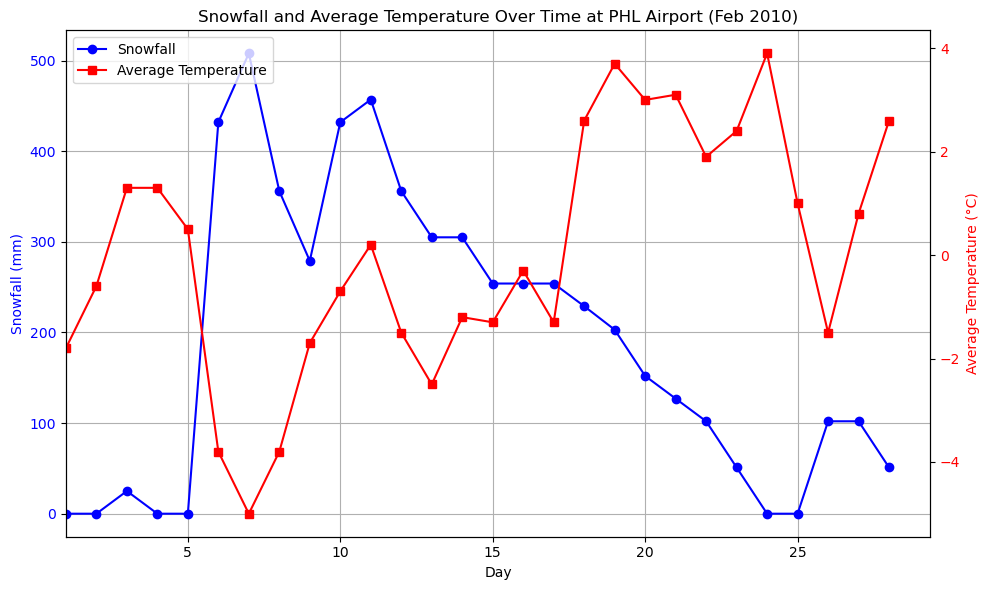

In [99]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_phl_2010_df['date'] = pd.to_datetime(weather_phl_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_phl_2010_df['date'].dt.day, weather_phl_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_phl_2010_df['date'].dt.day, weather_phl_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at PHL Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## EWR Newark Liberty International Airport in New Jersey

In [100]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE EWR 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72502']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_ewr_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_ewr_2010_df
#Newark Liberty International Airport EWR in New Jersey

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-1.4,-6.1,3.3,0.0,0.0,252.0,18.4,None,1023.3,None,72502
1,2010-02-02,-0.9,-4.4,1.1,1.8,0.0,NaN,7.6,None,1023.5,None,72502
2,2010-02-03,0.7,-1.7,5.6,1.8,51.0,NaN,13.3,None,NaN,None,72502
3,2010-02-04,0.8,-2.2,4.4,0.0,0.0,NaN,19.8,None,1025.9,None,72502
4,2010-02-05,0.8,-2.8,2.8,0.0,0.0,NaN,7.6,None,1023.1,None,72502
5,2010-02-06,-2.8,-6.1,0.6,0.5,0.0,27.0,27.7,None,NaN,None,72502
6,2010-02-07,-3.7,-8.9,2.8,0.0,0.0,321.0,20.9,None,1011.7,None,72502
7,2010-02-08,-1.0,-6.1,4.4,0.0,0.0,294.0,22.3,None,1014.5,None,72502
8,2010-02-09,1.3,-4.4,6.7,0.3,0.0,NaN,11.2,None,1015.7,None,72502
9,2010-02-10,NaN,-0.6,1.7,33.0,76.0,NaN,24.8,None,NaN,None,72502


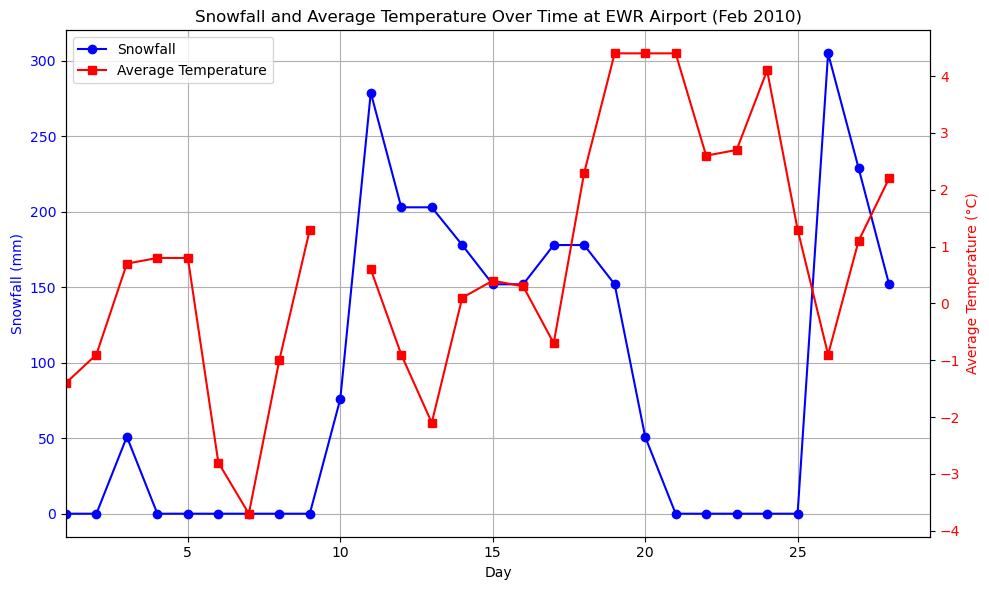

In [102]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_ewr_2010_df['date'] = pd.to_datetime(weather_ewr_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_ewr_2010_df['date'].dt.day, weather_ewr_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_ewr_2010_df['date'].dt.day, weather_ewr_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at EWR Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## JFK Airport in New York

In [103]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE JFK 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['74486']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_jfk_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_jfk_2010_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-0.9,-3.9,2.8,0.0,0.0,270.0,22.3,None,1023.4,None,74486
1,2010-02-02,-1.0,-3.9,0.6,0.0,0.0,NaN,10.1,None,1023.8,None,74486
2,2010-02-03,0.3,-2.2,4.4,0.8,25.0,NaN,15.8,None,1018.1,None,74486
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,317.0,22.3,None,1025.8,None,74486
4,2010-02-05,0.6,-1.7,2.8,0.0,0.0,NaN,11.5,None,1023.3,None,74486
5,2010-02-06,-3.1,-6.1,0.6,2.8,0.0,36.0,33.1,None,1008.1,None,74486
6,2010-02-07,-4.2,-8.9,1.7,0.0,25.0,330.0,28.1,None,1011.3,None,74486
7,2010-02-08,-1.2,-5.0,3.9,0.0,0.0,305.0,27.7,None,1014.3,None,74486
8,2010-02-09,0.8,-2.2,4.4,0.5,0.0,263.0,15.1,None,1015.9,None,74486
9,2010-02-10,-0.2,-1.1,0.6,31.5,51.0,NaN,31.3,None,992.7,None,74486


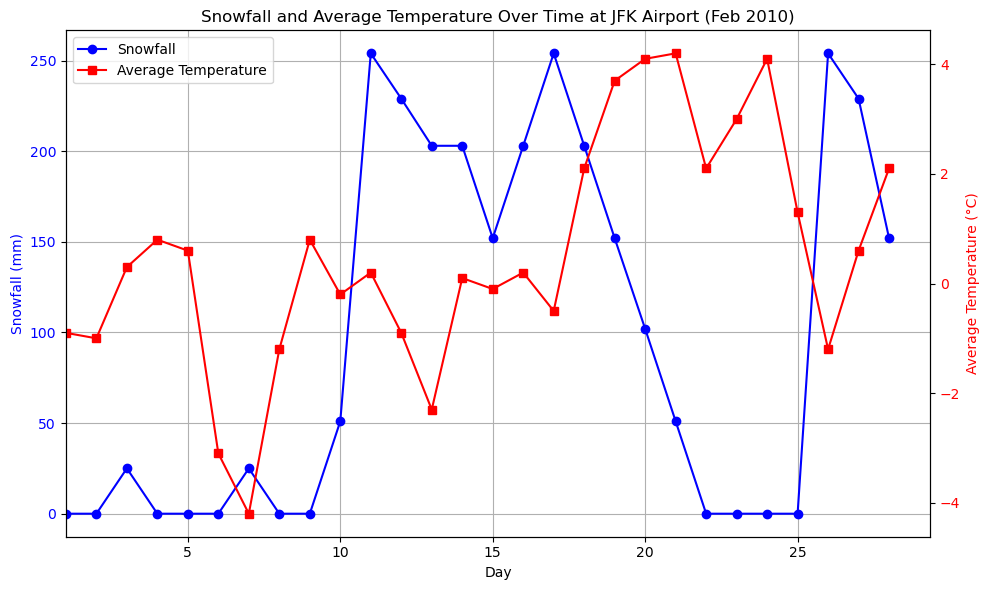

In [93]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_jfk_2010_df['date'] = pd.to_datetime(weather_jfk_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_jfk_2010_df['date'].dt.day, weather_jfk_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_jfk_2010_df['date'].dt.day, weather_jfk_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at JFK Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## LGA LaGuardia Airport in NYC

In [94]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE LGA 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72503']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_lga_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_lga_2010_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-0.5,-2.8,2.2,0.0,0.0,265.0,22.3,None,1023.0,None,72503
1,2010-02-02,-0.3,-1.7,1.1,0.3,0.0,NaN,10.8,None,1023.4,None,72503
2,2010-02-03,0.4,-2.2,3.3,2.0,25.0,NaN,16.9,None,1017.8,None,72503
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,312.0,22.3,None,1025.5,None,72503
4,2010-02-05,1.0,-0.6,2.8,0.0,0.0,NaN,11.2,None,1023.0,None,72503
5,2010-02-06,-2.3,-5.6,0.6,0.0,0.0,33.0,32.0,None,1008.2,None,72503
6,2010-02-07,-3.8,-7.8,1.7,0.0,0.0,325.0,28.1,None,1011.2,None,72503
7,2010-02-08,-1.0,-4.4,3.3,0.0,0.0,303.0,25.6,None,1014.0,None,72503
8,2010-02-09,1.8,-1.1,5.6,0.0,0.0,NaN,13.7,None,1015.4,None,72503
9,2010-02-10,NaN,-1.1,1.1,26.4,25.0,NaN,30.2,None,NaN,None,72503


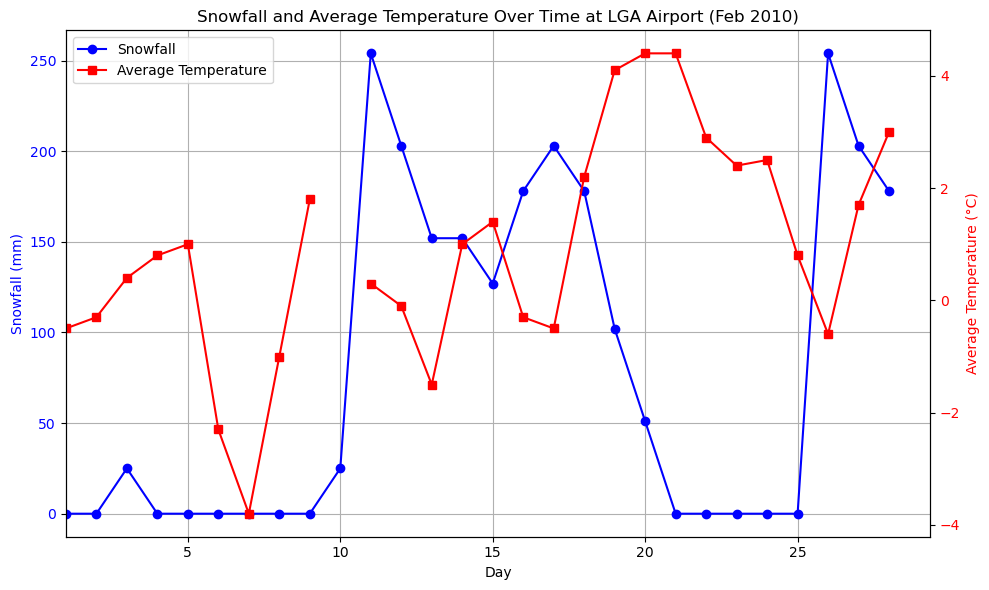

In [96]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_lga_2010_df['date'] = pd.to_datetime(weather_lga_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_lga_2010_df['date'].dt.day, weather_lga_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (mm)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_lga_2010_df['date'].dt.day, weather_lga_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at LGA Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Stacking DFs: DFs joined

In [104]:
# Dictionary mapping station IDs to FAA codes
station_to_faa = {
    '72403': 'IAD',
    '72406': 'BWI',
    '72408': 'PHL',
    '72502': 'EWR',
    '74486': 'JFK',
    '72503': 'LGA'
}

# Add a new column 'faa' based on the mapping
weather_stacked_df['faa'] = weather_stacked_df['station_id'].map(station_to_faa)

# Print the DataFrame with the new column
weather_stacked_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id,faa
0,2010-02-01,-0.9,-3.9,2.8,0.0,0.0,270.0,22.3,None,1023.4,None,74486,JFK
1,2010-02-02,-1.0,-3.9,0.6,0.0,0.0,NaN,10.1,None,1023.8,None,74486,JFK
2,2010-02-03,0.3,-2.2,4.4,0.8,25.0,NaN,15.8,None,1018.1,None,74486,JFK
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,317.0,22.3,None,1025.8,None,74486,JFK
4,2010-02-05,0.6,-1.7,2.8,0.0,0.0,NaN,11.5,None,1023.3,None,74486,JFK
5,2010-02-06,-3.1,-6.1,0.6,2.8,0.0,36.0,33.1,None,1008.1,None,74486,JFK
6,2010-02-07,-4.2,-8.9,1.7,0.0,25.0,330.0,28.1,None,1011.3,None,74486,JFK
7,2010-02-08,-1.2,-5.0,3.9,0.0,0.0,305.0,27.7,None,1014.3,None,74486,JFK
8,2010-02-09,0.8,-2.2,4.4,0.5,0.0,263.0,15.1,None,1015.9,None,74486,JFK
9,2010-02-10,-0.2,-1.1,0.6,31.5,51.0,NaN,31.3,None,992.7,None,74486,JFK


In [111]:
from sql_functions import get_engine
engine = get_engine()
schema = 'hh_analytics_24_1'

In [112]:
# Specify which table within your database you want to push your data to. Give your table an unambiguous name.
# Example: flights_sp for Sina's flights table, flights_groupname or similar
table_name = 'weather_stacked_groupx'
# If the specified table doesn't exist yet, it will be created
# With 'replace', your data will be replaced if the table already exists.
# This may take some time ...

# Write records stored in a dataframe to SQL database
if engine!=None:
    try:
        weather_stacked_df.to_sql(name=table_name, # Name of SQL table
                        con=engine, # Engine or connection
                        if_exists='replace', # Drop the table before inserting new values 
                        schema=schema, # Use schmea that was defined earlier
                        index=False, # Write DataFrame index as a column
                        chunksize=5000, # Specify the number of rows in each batch to be written at a time
                        method='multi') # Pass multiple values in a single INSERT clause
        print(f"The {table_name} table was imported successfully.")
    # Error handling
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        engine = None

The weather_stacked_groupx table was imported successfully.


In [55]:
# Group the DataFrame by 'date' and 'faa' columns
grouped_df = weather_stacked_df.groupby(['date', 'faa'])



In [49]:
# Group the DataFrame by the 'faa' column
grouped_df = weather_stacked_df.groupby('faa')

# Now you can perform aggregate operations on each group, for example:
# Calculate the mean temperature for each group
mean_temp_by_faa = grouped_df(['snow', 'date'])

# Print the mean temperature for each group
mean_temp_by_faa


TypeError: 'DataFrameGroupBy' object is not callable

## STOP HERE
## THE END

In [39]:
#Retrieve API data
#OUTPUT API data as dataframe
#SCOPE LGA 2010

import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['KNYC0']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-15'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
weather_lga_2010_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
weather_lga_2010_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-1.4,-3.9,1.7,0.0,None,NaN,13.1,None,1022.7,None,KNYC0
1,2010-02-02,-0.8,-2.2,0.6,NaN,None,NaN,7.4,None,1023.2,None,KNYC0
2,2010-02-03,0.2,-2.0,3.3,NaN,None,NaN,8.4,None,NaN,None,KNYC0
3,2010-02-04,0.1,-2.2,2.2,0.0,None,NaN,14.6,None,1025.4,None,KNYC0
4,2010-02-05,0.5,-1.1,2.2,0.0,None,NaN,6.8,None,1022.9,None,KNYC0
5,2010-02-06,-2.9,-5.6,0.6,NaN,None,37.0,22.0,None,NaN,None,KNYC0
6,2010-02-07,-4.5,-8.3,1.1,0.0,None,NaN,16.8,None,1011.1,None,KNYC0
7,2010-02-08,-1.7,-5.0,2.8,0.0,None,NaN,15.5,None,1013.8,None,KNYC0
8,2010-02-09,1.3,-2.2,5.6,NaN,None,NaN,8.7,None,1015.3,None,KNYC0
9,2010-02-10,0.1,-1.1,1.1,33.8,None,NaN,18.3,None,NaN,None,KNYC0


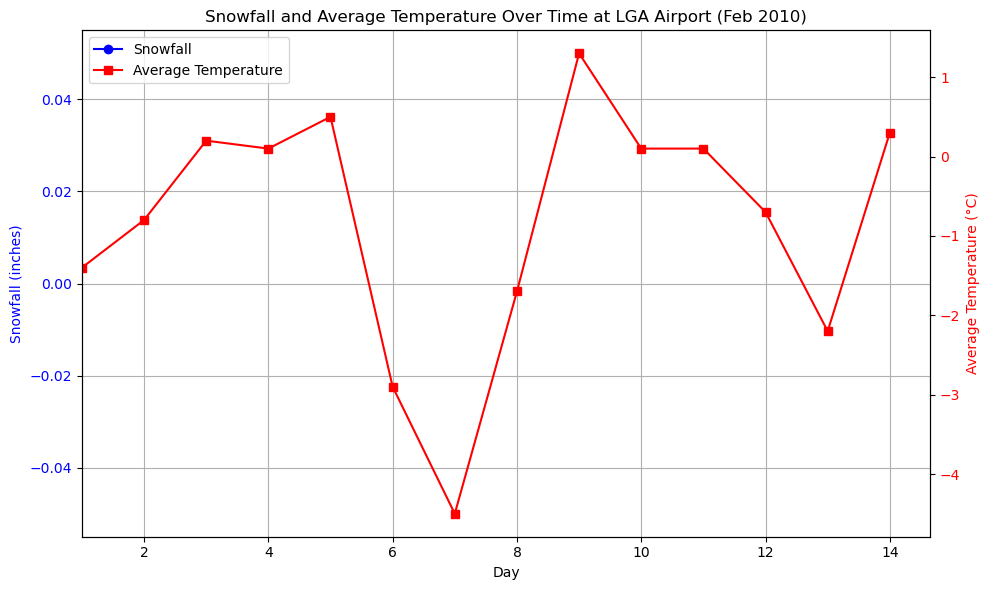

In [75]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
weather_lga_2010_df['date'] = pd.to_datetime(weather_lga_2010_df['date'])

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot snowfall data on primary y-axis
ax1.plot(weather_lga_2010_df['date'].dt.day, weather_lga_2010_df['snow'], color='b', marker='o', linestyle='-', label='Snowfall')
ax1.set_xlabel('Day')
ax1.set_ylabel('Snowfall (inches)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Create secondary y-axis for tavg data
ax2 = ax1.twinx()
ax2.plot(weather_lga_2010_df['date'].dt.day, weather_lga_2010_df['tavg'], color='r', marker='s', linestyle='-', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set x-axis limit to start at 1
ax1.set_xlim(left=1)

# Title
plt.title('Snowfall and Average Temperature Over Time at LGA Airport (Feb 2010)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [40]:
import pandas as pd

# Assuming you have the following DataFrames:
# weather_jfk_2010_df
# weather_iad_2010_df
# weather_bwi_2010_df
# weather_phl_2010_df
# weather_ewr_2010_df

# List of DataFrames
dfs = [weather_jfk_2010_df, weather_iad_2010_df, weather_bwi_2010_df, weather_phl_2010_df, weather_ewr_2010_df]

# Concatenate the DataFrames vertically
weather_stacked_df = pd.concat(dfs, ignore_index=True)

# Print the stacked DataFrame
weather_stacked_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-0.9,-3.9,2.8,0.0,0.0,270.0,22.3,None,1023.4,None,74486
1,2010-02-02,-1.0,-3.9,0.6,0.0,0.0,NaN,10.1,None,1023.8,None,74486
2,2010-02-03,0.3,-2.2,4.4,0.8,25.0,NaN,15.8,None,1018.1,None,74486
3,2010-02-04,0.8,-1.7,3.3,0.0,0.0,317.0,22.3,None,1025.8,None,74486
4,2010-02-05,0.6,-1.7,2.8,0.0,0.0,NaN,11.5,None,1023.3,None,74486
5,2010-02-06,-3.1,-6.1,0.6,2.8,0.0,36.0,33.1,None,1008.1,None,74486
6,2010-02-07,-4.2,-8.9,1.7,0.0,25.0,330.0,28.1,None,1011.3,None,74486
7,2010-02-08,-1.2,-5.0,3.9,0.0,0.0,305.0,27.7,None,1014.3,None,74486
8,2010-02-09,0.8,-2.2,4.4,0.5,0.0,263.0,15.1,None,1015.9,None,74486
9,2010-02-10,-0.2,-1.1,0.6,31.5,51.0,NaN,31.3,None,992.7,None,74486


In [39]:
import meteostat

https://dev.meteostat.net/python/#installation

In [ ]:
#Attempting to get to weather stations as a list: 
import requests

url = 'https://meteostat.p.rapidapi.com/stations/daily'

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)


In [2]:
import os
from dotenv import load_dotenv
import requests

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['10637'] #Insert IDs here

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2020-02-01',
        'end': '2020-02-28'
    }

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily'

#Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}

# Send request to the API
response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)

{'meta': {'generated': '2024-05-07 20:45:05'}, 'data': [{'date': '2020-01-01', 'tavg': 0.4, 'tmin': -3.6, 'tmax': 4.5, 'prcp': 0.1, 'snow': 0.0, 'wdir': 47.0, 'wspd': 10.1, 'wpgt': 22.3, 'pres': 1035.5, 'tsun': 438}]}


In [25]:
#Attempting to get to weather stations as DF 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403', '72406', '72408', 'KLDJ0', '74486', 'KNYC0' ] #Insert IDs here

# Initialize an empty list to store the DataFrame for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-15'
    }

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily' #First try
#url = 'https://meteostat.p.rapidapi.com/point/hourly'#Second try

#Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Add the station ID as a column in the DataFrame
weather_df['station_id'] = station_id

# Append the DataFrame to the list
dfs.append(weather_df)

# Concatenate all DataFrames into a single DataFrame
final_weather_df = pd.concat(dfs, ignore_index=True)

# Print or use the DataFrame as needed
final_weather_df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,station_id
0,2010-02-01,-1.4,-3.9,1.7,0.0,None,NaN,13.1,None,1022.7,None,KNYC0
1,2010-02-02,-0.8,-2.2,0.6,NaN,None,NaN,7.4,None,1023.2,None,KNYC0
2,2010-02-03,0.2,-2.0,3.3,NaN,None,NaN,8.4,None,NaN,None,KNYC0
3,2010-02-04,0.1,-2.2,2.2,0.0,None,NaN,14.6,None,1025.4,None,KNYC0
4,2010-02-05,0.5,-1.1,2.2,0.0,None,NaN,6.8,None,1022.9,None,KNYC0
5,2010-02-06,-2.9,-5.6,0.6,NaN,None,37.0,22.0,None,NaN,None,KNYC0
6,2010-02-07,-4.5,-8.3,1.1,0.0,None,NaN,16.8,None,1011.1,None,KNYC0
7,2010-02-08,-1.7,-5.0,2.8,0.0,None,NaN,15.5,None,1013.8,None,KNYC0
8,2010-02-09,1.3,-2.2,5.6,NaN,None,NaN,8.7,None,1015.3,None,KNYC0
9,2010-02-10,0.1,-1.1,1.1,33.8,None,NaN,18.3,None,NaN,None,KNYC0


In [27]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403', '72406', '72408', 'KLDJ0', '74486', 'KNYC0']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-15'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
final_weather_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
print(final_weather_df)


Failed to retrieve data for station ID: KLDJ0
Failed to retrieve data for station ID: KNYC0
          date  tavg  tmin  tmax  prcp   snow   wdir  wspd  wpgt    pres  \
0   2010-02-01  -4.5 -14.4   3.3   0.0   51.0    NaN   6.1  None  1026.4   
1   2010-02-02  -1.6  -9.4   4.4   7.1   25.0    NaN   3.2  None     NaN   
2   2010-02-03   1.2  -2.8   4.4   0.5  102.0    NaN   8.3  None  1020.2   
3   2010-02-04   1.3  -2.8   4.4   0.0   51.0    NaN   7.6  None  1028.7   
4   2010-02-05   0.1  -1.1   1.7  37.3   25.0    NaN   9.7  None     NaN   
5   2010-02-06  -2.9 -12.2   0.0  50.3  457.0    NaN  16.9  None     NaN   
6   2010-02-07  -6.1 -13.9  -0.6   0.0  533.0    NaN  12.6  None  1016.5   
7   2010-02-08  -5.0 -10.6   0.0   0.0  508.0    NaN  11.9  None  1021.0   
8   2010-02-09  -4.6 -12.2   1.7   7.6  483.0    NaN   3.2  None     NaN   
9   2010-02-10  -3.6  -6.7  -1.1  10.7  660.0  321.0  31.0  None     NaN   
10  2010-02-11   0.1  -2.2   3.3   0.0  635.0  306.0  25.6  None  1009.2

In [28]:
final_weather_df['station_id']

0     72403
1     72403
2     72403
3     72403
4     72403
5     72403
6     72403
7     72403
8     72403
9     72403
10    72403
11    72403
12    72403
13    72403
14    72403
15    72406
16    72406
17    72406
18    72406
19    72406
20    72406
21    72406
22    72406
23    72406
24    72406
25    72406
26    72406
27    72406
28    72406
29    72406
30    72408
31    72408
32    72408
33    72408
34    72408
35    72408
36    72408
37    72408
38    72408
39    72408
40    72408
41    72408
42    72408
43    72408
44    72408
45    74486
46    74486
47    74486
48    74486
49    74486
50    74486
51    74486
52    74486
53    74486
54    74486
55    74486
56    74486
57    74486
58    74486
59    74486
Name: station_id, dtype: object

In [ ]:
#Attempting to get to weather stations as DF 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['10637'] #Insert IDs here

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-28'
    }

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/point/hourly?lat=38.9554&lon=-77.4558&start=2010-02-01&end=2010-02-28'#Second try

#Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Print or use the DataFrame as needed
weather_df


Follow this for API key: 
https://rapidapi.com/developer/authorization/default-application_9067818

In [ ]:
  url: 'https://meteostat.p.rapidapi.com/stations/meta',
  params: {id: '10637'},
  headers: {
    'X-RapidAPI-Key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b',
    'X-RapidAPI-Host': 'meteostat.p.rapidapi.com'
  }

#Create location directory: 
location_directory = ["Sao Paulo",
          "Cape Town",
          "Havana"]

#Define root url
url = 'http://api.openweathermap.org/data/2.5/weather?'

#Define parameters to be added to url
parameters = {
    'appid': os.getenv('openweather_api_key'), 
    'units': 'metric',
    'lang': 'pt'}

#Define how the output will be displayed
weather_current_df = pd.DataFrame([])

#For each directory entry, define what should happen: 
for each_location in location_directory:
  #Pass on the parameters for each location:
  parameters["q"] = each_location #Check what this 'q' means 
  #The response is a REQUEST to fetch data, which is successful by following the url AND parameters:
  response = requests.get(url, parameters)
  #The output will be a response in javascript object notation, JSON format:
  weather_json_response = response.json()
  #Given the json format, next NORMALIZE it, so it can be outputted as a DATAFRAME: 
  weather_json_to_df = pd.json_normalize(weather_json_response, 
                                    sep="_", #naming convention, e.g. coord_lon, coord_lat
                                    record_path="weather", 
                                    meta=["id", #I can also leave out the meta completely 
                                          "name",
                                          "cod",
                                          "timezone",
                                          ["coord", "lon"], 
                                            ["coord", "lat"], 
                                            "base",
                                            ["main", "temp"],
                                            ["main", "feels_like"],
                                            ["main", "temp_min"],
                                            ["main", "temp_max"], 
                                            ["main", "pressure"], 
                                            ["main", "humidity"], 
                                            "visibility", 
                                            ["wind", "speed"], 
                                            ["wind", "deg"], 
                                            ["clouds", "all"], 
                                            "dt", 
                                            ["sys", "type"], 
                                            ["sys", "id"],
                                            ["sys", "country"],
                                            ["sys", "sunrise"],
                                            ["sys", "sunset"]], 
                                    record_prefix="weather_") #Insert this prefix in every column name
  #Concatenate the DFs: one was the normalized one from the JSON response, and the other one was the empty one created earlier
  weather_current_df = pd.concat([weather_current_df, weather_json_to_df], ignore_index=True)
weather_current_df

In [79]:
import requests

def get_nearest_station(lat, lon):
    url = 'https://meteostat.p.rapidapi.com/stations/nearby'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace with your actual API key
    }
    params = {
        'lat': lat,
        'lon': lon
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    return data['data'][0]['id'] if data['data'] else None

# Example usage
latitude = 38.9445
longitude = -77.4558
station_code = get_nearest_station(latitude, longitude)
print(station_code)  # This will print the nearest weather station code

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [14]:
# Import Meteostat library
from meteostat import Stations

# Example usage
latitude = 40.7769
longitude = -73.874

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)

# Print DataFrame
print(station)

                            name country region   wmo  icao  latitude  \
id                                                                      
KNYC0  New York City / Yorkville      US     NY  <NA>  KNYC   40.7789   

       longitude  elevation          timezone hourly_start hourly_end  \
id                                                                      
KNYC0   -73.9692        3.0  America/New_York   1943-12-01 2024-05-07   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
KNYC0  1943-12-02 2022-04-24    1944-01-01  2021-01-01  8019.117024  


In [ ]:
IAD = Point(38.9445, -77.4558, 95) # station ID is = 72403
BWI = Point(39.1774, -76.6684, 146) # station ID is = 72406
PHL = Point(39.8721, -75.2431, 36) #station ID is = 72408
EWR = Point(40.6895, -74.1745, 18) #station ID is = KLDJ0
JFK = Point(40.6413, -73.7781, 13) #station ID is =74486
LGA = Point(40.7769, -73.874, 21) #station ID is =KNYC0

In [41]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 2, 1)
end = datetime(2010, 2, 28)

# Create Point for Vancouver, BC
DCA = Point(38.8521, -77.0377, 0)

# Get daily data for 2018
data = Daily(DCA, start, end)
data = data.fetch()
data
# Plot line chart including average, minimum and maximum temperature
#data.plot(y=['tavg', 'tmin', 'tmax'])
#plt.show()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2010-02-01,-0.8,-6.7,3.9,0.0,102.0,NaN,8.3,NaN,1026.6,NaN
2010-02-02,0.5,-2.8,5.0,5.1,51.0,NaN,6.8,NaN,1022.2,NaN
2010-02-03,2.4,-1.1,5.6,1.5,127.0,323.0,9.4,NaN,1020.1,NaN
2010-02-04,2.4,-0.6,5.0,0.0,25.0,NaN,12.2,NaN,1028.9,NaN
2010-02-05,1.0,0.0,2.8,19.6,0.0,NaN,12.2,NaN,1021.6,NaN
2010-02-06,-2.4,-6.1,0.0,18.5,330.0,7.0,25.9,NaN,1004.7,NaN
2010-02-07,-4.3,-8.9,0.0,0.0,457.0,316.0,13.3,NaN,1016.2,NaN
2010-02-08,-2.6,-6.1,1.1,0.0,356.0,292.0,13.7,NaN,1020.9,NaN
2010-02-09,-1.7,-5.6,2.2,9.7,330.0,NaN,6.1,NaN,1017.2,NaN
